# 2017-07-23 U.S. Labor Productivity

Downloaded from [here](http://www.bradford-delong.com/2017/07/monday-smackdown-republican-economists-burn-yet-more-of-their-reputations-department.html) for education and inspiration.

## Setting Up the Environment

In [13]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from datetime import datetime
import pandas as pd

# Plotly configuration section uneeded and redacted.

sns.set(color_codes = True)
import statsmodels.formula.api as smf


## Reading in the Data, and Checking It...

from: http://delong.typepad.com/2017-07-23-u.s.-labor-productivity.csv

from https://www.icloud.com/numbers/0y4crooWxqklfqJQMHj1bGtbQ

In [3]:
# as a time series dataframe object

data_source_url = 'http://delong.typepad.com/2017-07-23-u.s.-labor-productivity.csv'

lpdf = pd.read_csv(data_source_url, parse_dates = True, index_col = 0)

In [4]:
# check to see if our data is in the format we want it to be

lpdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 281 entries, 1947-01-01 to 2017-01-01
Data columns (total 2 columns):
time                    281 non-null float64
real_output_per_hour    281 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [5]:
# check to see if data looks like it should

lpdf

,time,real_output_per_hour
date,,
1947-01-01,1947.00,24.655
1947-04-01,1947.25,25.226
1947-07-01,1947.50,24.483
1947-10-01,1947.75,25.509
1948-01-01,1948.00,25.608
1948-04-01,1948.25,25.544
1948-07-01,1948.50,25.578
1948-10-01,1948.75,25.680
1949-01-01,1949.00,25.931


In [6]:
lpdf.lag_real_output_per_hour = lpdf.real_output_per_hour.shift(1)

lpdf.lag_time = lpdf.time.shift(1)

lpdf.growth_of_labor_productivity = (np.log(
    lpdf.real_output_per_hour/lpdf.lag_real_output_per_hour)/
    (lpdf.time - lpdf.lag_time))


lpdf.growth_of_labor_productivity

date
1947-01-01         NaN
1947-04-01    0.091582
1947-07-01   -0.119585
1947-10-01    0.164209
1948-01-01    0.015494
1948-04-01   -0.010009
1948-07-01    0.005321
1948-10-01    0.015919
1949-01-01    0.038907
1949-04-01    0.041892
1949-07-01    0.095031
1949-10-01   -0.021373
1950-01-01    0.136131
1950-04-01    0.044653
1950-07-01    0.085735
1950-10-01    0.006024
1951-01-01    0.008251
1951-04-01   -0.013995
1951-07-01    0.090652
1951-10-01    0.009445
1952-01-01    0.017055
1952-04-01   -0.003133
1952-07-01   -0.015563
1952-10-01    0.078693
1953-01-01    0.031395
1953-04-01    0.012755
1953-07-01    0.019584
1953-10-01   -0.015076
1954-01-01    0.007016
1954-04-01    0.028468
                ...   
2009-10-01    0.047841
2010-01-01    0.020396
2010-04-01    0.014355
2010-07-01    0.020027
2010-10-01    0.016311
2011-01-01   -0.033427
2011-04-01    0.013250
2011-07-01   -0.007239
2011-10-01    0.027609
2012-01-01    0.005653
2012-04-01    0.023181
2012-07-01   -0.006844
2012-1

## Exploratory Data Analysis...

### Quarterly Productivity Growth and Time...

Here is the post-WWII productivity scatter:

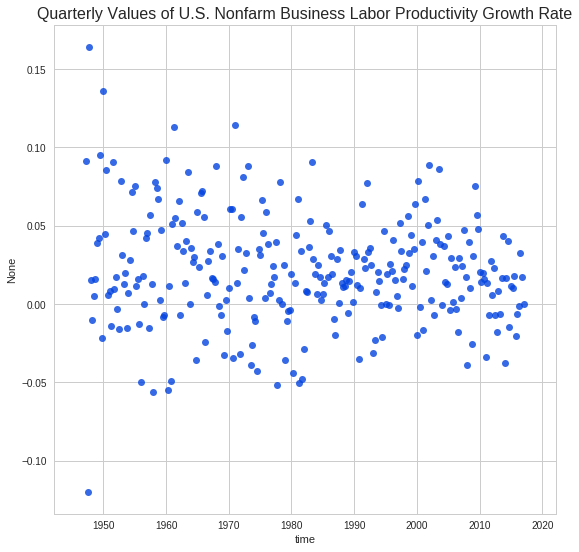

In [7]:
sns.set_style("whitegrid")

color_list = ["blue", "green", "red"]

color_list_palette = sns.xkcd_palette(color_list)

sns.set_palette(color_list_palette)

plt.figure(figsize=(9, 9))
plt.ylabel('Quarterly Productivity Growth (Annualized)')
plt.xlabel('Date')
plt.title("Quarterly Values of U.S. Nonfarm Business Labor Productivity Growth Rate", fontsize=16)

sns.regplot(lpdf.time, lpdf.growth_of_labor_productivity, 
    fit_reg=False # no regression line
    )

Here is the nonparametric smoothed lowess trend:

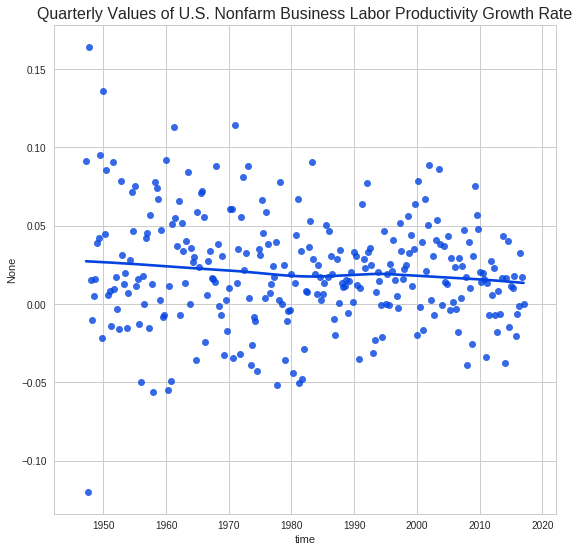

In [8]:
plt.figure(figsize=(9,9))
plt.title("Quarterly Values of U.S. Nonfarm Business Labor Productivity Growth Rate", fontsize=16)

plt.ylabel('Quarterly Productivity Growth (Annualized)')
plt.xlabel('Date')

sns.regplot(lpdf.time, lpdf.growth_of_labor_productivity, lowess=True)

Let's take a closer look at that:

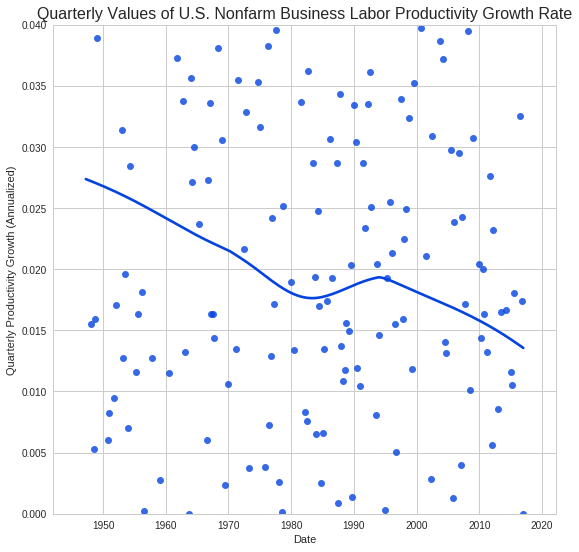

In [9]:
plt.figure(figsize=(9,9))
plt.title("Quarterly Values of U.S. Nonfarm Business Labor Productivity Growth Rate", fontsize=16)

sns.regplot(lpdf.time, lpdf.growth_of_labor_productivity, lowess=True)

axes = plt.gca()
axes.set_ylim([0, +.04])
plt.ylabel('Quarterly Productivity Growth (Annualized)')
plt.xlabel('Date')



In [10]:
lpdf.decades_minus_1980 = (lpdf.time - 1980.0)/10.0

model1 = smf.ols("lpdf.growth_of_labor_productivity ~ lpdf.decades_minus_1980", lpdf).fit()

print(model1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     lpdf.growth_of_labor_productivity   R-squared:                       0.014
Model:                                           OLS   Adj. R-squared:                  0.010
Method:                                Least Squares   F-statistic:                     3.878
Date:                               Wed, 26 Jul 2017   Prob (F-statistic):             0.0499
Time:                                       14:45:35   Log-Likelihood:                 539.55
No. Observations:                                280   AIC:                            -1075.
Df Residuals:                                    278   BIC:                            -1068.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

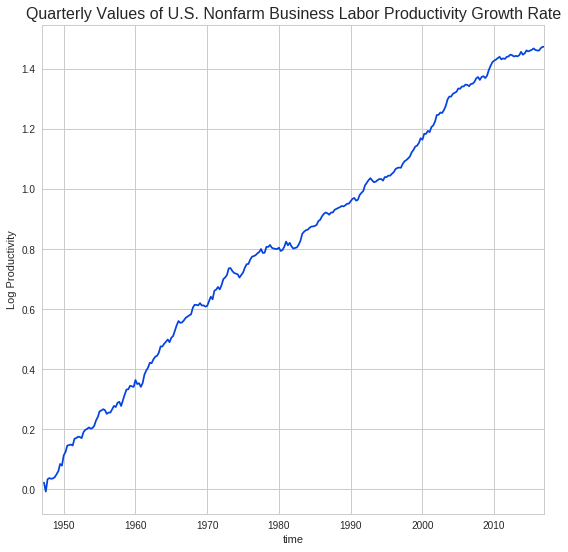

In [11]:
lpdf.log_labor_productivity = lpdf.growth_of_labor_productivity.cumsum(axis=0)/4

plt.figure(figsize=(9, 9))
plt.title("Quarterly Values of U.S. Nonfarm Business Labor Productivity Growth Rate", fontsize=16)

plt.ylabel('Log Productivity')
plt.xlabel('Date')

sns.tsplot(lpdf.log_labor_productivity, time=lpdf.time)

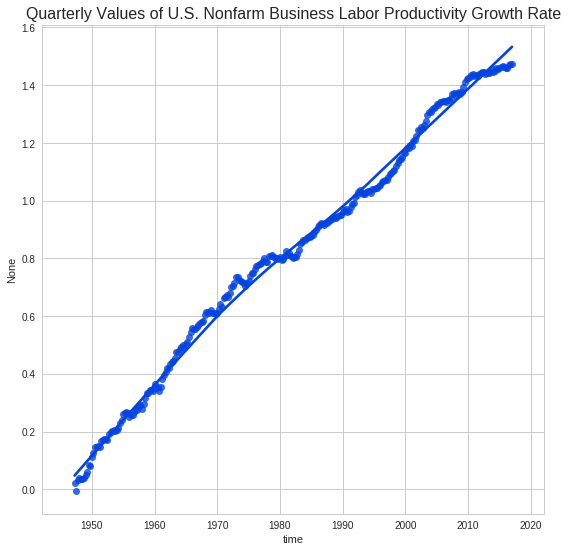

In [12]:
plt.figure(figsize=(9, 9))
plt.title("Quarterly Values of U.S. Nonfarm Business Labor Productivity Growth Rate", fontsize=16)

sns.regplot(lpdf.time, lpdf.log_labor_productivity, data=lpdf, lowess=True)

